In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [208]:
# Importing the training dataset into a pandas dataframe
df_train = pd.read_csv("C:/Users/rashm/Desktop/6Sense/6sense_DS_TakeHome_Challenge/2021_6sense_DS_Takehome_Challenge/training.tsv", sep = '\t', header = None)
# df_test = pd.read_csv("C:/Users/rashm/Desktop/6Sense/6sense_DS_TakeHome_Challenge/2021_6sense_DS_Takehome_Challenge/test.tsv", sep = '\t', header = None)

In [219]:
df_train.head()

,User_ID,Activity_Date,Activity_Type
0,00002acbe042d69,2013-07-11,EmailOpen
1,00002acbe042d69,2013-07-11,FormSubmit
2,00002acbe042d69,2013-07-15,EmailOpen
3,00002acbe042d69,2013-07-17,EmailOpen
4,00002acbe042d69,2013-07-18,EmailOpen


In [210]:
# Giving proper column values according to the description
df_train.columns = ['User_ID','Activity_Date','Activity_Type']

In [211]:
# Understanding the dataset better
# Getting the descriptive statstics parameters for the dataset 
df_train.describe(include = 'all')

,User_ID,Activity_Date,Activity_Type
count,4918677,4918677,4918677
unique,341568,671,7
top,2cd311cc3ef2d0c,2014-06-18,EmailOpen
freq,2718,50184,3191732


In [212]:
df_train.dtypes

User_ID          object
Activity_Date    object
Activity_Type    object
dtype: object

In [217]:
# Checking for missing values in the dataset

df_train.isnull().sum()

User_ID          0
Activity_Date    0
Activity_Type    0
dtype: int64

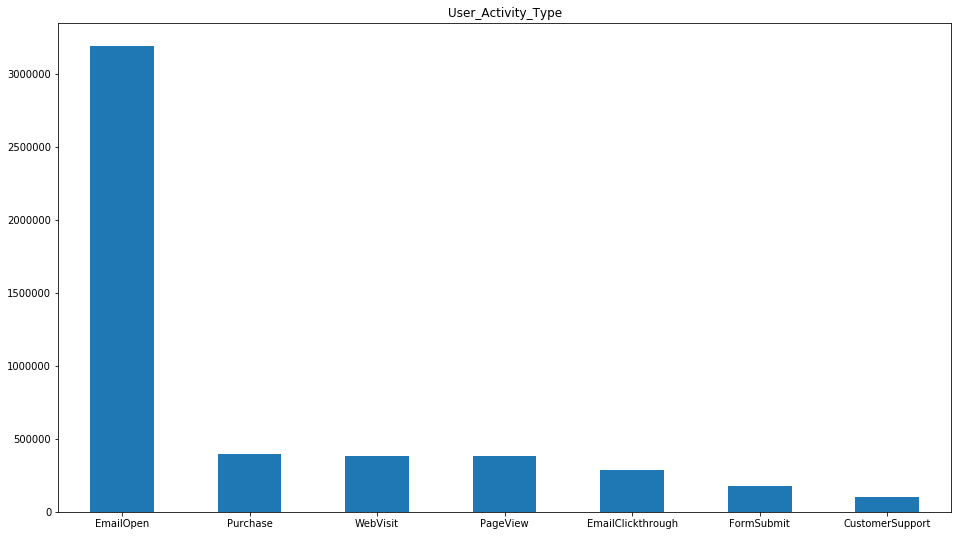

In [220]:
# Univariate Analysis to understand better the distribution of user activity across multiple users

df_train['Activity_Type'].value_counts().plot(kind='bar', title = 'User_Activity_Type', figsize=(16,9))
plt.xticks(rotation=0)
plt.show() 

In [221]:
df_train['Activity_Type'] = df_train['Activity_Type'].astype('category')

In [185]:
# df_train = pd.concat([df_train, pd.get_dummies(df_train["Activity_Type"], prefix="")], axis = 1)


In [189]:
# df_train['Activity_Type_Cat'] = df_train['Activity_Type'].cat.codes

In [190]:
# df_train.drop(["Activity_Type"], axis = 1, inplace = True)

In [222]:
df_train

,User_ID,Activity_Date,Activity_Type
0,00002acbe042d69,2013-07-11,EmailOpen
1,00002acbe042d69,2013-07-11,FormSubmit
2,00002acbe042d69,2013-07-15,EmailOpen
3,00002acbe042d69,2013-07-17,EmailOpen
4,00002acbe042d69,2013-07-18,EmailOpen
...,...,...,...
4918672,fffff031760c3f5,2014-06-24,EmailOpen
4918673,fffff031760c3f5,2014-06-25,EmailOpen
4918674,fffff031760c3f5,2014-07-02,EmailOpen
4918675,fffff031760c3f5,2014-08-11,EmailOpen


In [193]:
df_train.sort_values(by=df_train["Activity_Date"],ascending=True, inplace=True)

In [225]:
funnel_steps = ["EmailOpen","EmailClickThrough", "FormSubmit", "WebVist", "PageView", "CustomerSupport","Purchase"]

In [226]:
# Getting insights on user behaviour using Funnel Analysis

def funnelize(user_group, funnel_steps):
    user_freq = [0 for i in funnel_steps]
    
    for _,row in user_group.iterrows():
        activity = row['Activity_Type']
        if activity in funnel_steps:
            idx = funnel_steps.index(activity)
            user_freq[idx] += 1
    return user_freq

In [228]:
grouped_data = df_train.groupby("User_ID").apply(funnelize, funnel_steps)

In [232]:
grouped_data.head(20)

User_ID
00002acbe042d69     [9, 0, 1, 0, 0, 0, 0]
0000a3a34bd07e6    [20, 0, 0, 0, 0, 0, 0]
0000ecf58c94668    [11, 0, 1, 0, 0, 1, 6]
00012205dd4613b     [2, 0, 0, 0, 0, 0, 0]
000198d39a568cf     [0, 0, 0, 0, 0, 1, 1]
0001b315b991cf0     [1, 0, 0, 0, 0, 0, 0]
00022618457fcf2     [0, 0, 0, 0, 0, 1, 1]
000256826de4432     [0, 0, 0, 0, 0, 1, 1]
000269150971d08     [3, 0, 0, 0, 0, 0, 0]
000297ba4fa5026     [8, 0, 0, 0, 0, 0, 0]
0002f5c71a86aa3     [2, 0, 0, 0, 0, 0, 0]
00031fd1fe88e97     [6, 0, 0, 0, 0, 0, 0]
000342505b41079    [20, 0, 0, 0, 1, 0, 0]
00034a728464ee9     [2, 0, 1, 0, 1, 0, 0]
000350f7edefdbc     [4, 0, 0, 0, 0, 0, 0]
0003b304dd7cfae     [4, 0, 0, 0, 0, 0, 0]
0003c9dd1167d80     [1, 0, 0, 0, 0, 0, 0]
0003d5a9673e71d     [3, 0, 0, 0, 0, 0, 0]
0003d63c6efd6da     [2, 0, 0, 0, 0, 0, 0]
0003ee709c3b5dc     [8, 0, 2, 0, 0, 0, 0]
dtype: object

In [231]:
# activity_counts = grouped_data.apply(funnelize, activity_list, funnel_steps)

In [233]:
newTrain = pd.DataFrame(list(grouped_data.values),index = grouped_data.index,columns = funnel_steps)

In [234]:
newTrain

,EmailOpen,EmailClickThrough,FormSubmit,WebVist,PageView,CustomerSupport,Purchase
User_ID,,,,,,,
00002acbe042d69,9,0,1,0,0,0,0
0000a3a34bd07e6,20,0,0,0,0,0,0
0000ecf58c94668,11,0,1,0,0,1,6
00012205dd4613b,2,0,0,0,0,0,0
000198d39a568cf,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
ffffa46241fb077,0,0,0,0,0,1,2
ffffa4cc0190881,1,0,0,0,0,0,0
ffffa7beb541707,2,0,1,0,0,0,0


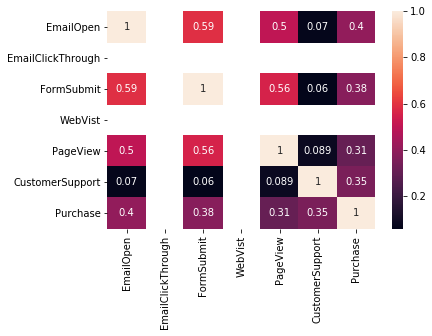

In [235]:
corrMatrix = newTrain.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()